In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon



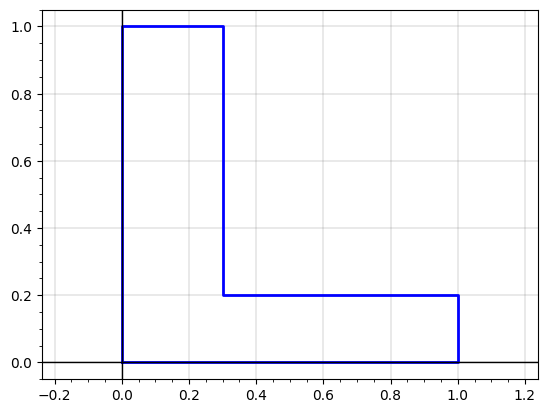

In [12]:
# Draw an L shaped region in R2 
def L_shape():
    X = np.array([[0, 0], [1, 0], [1, 0.2], [0.3, 0.2], [0.3, 1], [0, 1], [0, 0]])
    return X

# plot the polygon
def plot_polygon(X):
    # increase thickness of lines
    plt.rcParams['lines.linewidth'] = 2
    # plot the polygon
    plt.plot(X[:, 0], X[:, 1], 'b')

    plt.axis('equal')
    #show xy axes and some grid lines
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid(True)
    #make the grid dotted
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.25', color='grey')

    return plt

region = L_shape()
poly = Polygon(region)
plt = plot_polygon(region)
plt.show()

In [13]:
n = 1000

# starting point
X = [(0, 0)]

# search parameters
delta = 0.1
search_distribution = "normal"


In [14]:
# nearby candidate points
def generate_candidate(x, y, delta, distribution):
    if distribution == "uniform":
        x_new = np.random.uniform(x - delta, x + delta)
        y_new = np.random.uniform(y - delta, y + delta)
    elif distribution == "normal":
        x_new = np.random.normal(x, delta)
        y_new = np.random.normal(y, delta)
    return (x_new, y_new)
  
# check if a point is in the region
def is_in_region(x, region):
  return poly.contains(Point(x))

In [15]:
def Metropolis_Hastings(n, X, delta, search_distribution):
  for i in range(n):
    new_sample = generate_candidate(X[-1][0], X[-1][1], delta, search_distribution)
    if is_in_region(new_sample, poly):
      X.append(new_sample)  
  return X

In [16]:
# plot first k points in X
def plot_points(polygon, X, k):
    plt = plot_polygon(polygon)
    for i in range(k-1):
      plt.plot(X[i][0], X[i][1], 'r.',markersize=2)
    
    plt.plot(X[k][0], X[k][1], 'x',markersize=10)

    # draw a filled circle at the last point of radius delta
    circle = plt.Circle((X[k][0], X[k][1]), delta, color='r', fill=True, alpha=0.5)
    plt.gca().add_artist(circle)

    # show the value of k, delta, and acceptance rate on the plot in the legend in the top right corner
    plt.legend([f'\n k = {k}, \n delta = {delta}'], loc='upper right')
        
    plt.show()



In [17]:
def animate(X, region):
  widgets.interact(plot_points, polygon=widgets.fixed(region), X=widgets.fixed(X), k=widgets.Play(min=0, max=len(X)-1, step=1, value=0), continuous_update=True)

In [18]:
n_1 = 500
X_1 = [(0, 0)]
delta_1 = 0.5
search_distribution = "normal"

X_1 = Metropolis_Hastings(n_1, X_1, delta_1, search_distribution)

print(f"Acceptance rate: {len(X_1)/n_1}")
animate(X_1, region)

Acceptance rate: 0.188


interactive(children=(Play(value=0, description='k', max=93), Output()), _dom_classes=('widget-interact',))

In [19]:
n_2 = 500
X_2 = [(0, 0)]
delta_2 = 0.3
search_distribution = "normal"

X_2 = Metropolis_Hastings(n_2, X_2, delta_2, search_distribution)

print(f"Acceptance rate: {len(X_2)/n_2}")
animate(X_2, region)

Acceptance rate: 0.302


interactive(children=(Play(value=0, description='k', max=150), Output()), _dom_classes=('widget-interact',))

In [20]:
n_3 = 500
X_3 = [(0, 0)]
delta_3 = 0.1
search_distribution = "normal"

X_3 = Metropolis_Hastings(n_3, X_3, delta_3, search_distribution)

print(f"Acceptance rate: {len(X_3)/n_3}")
animate(X_3, region)

Acceptance rate: 0.634


interactive(children=(Play(value=0, description='k', max=316), Output()), _dom_classes=('widget-interact',))